In [1]:
!nvidia-smi

Tue Jan 23 13:57:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install Grounding DINO 🦕

In [3]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .
!pip install -q roboflow

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 421, done.
remote: Counting objects: 100% (182/182), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 421 (delta 136), reused 131 (delta 124), pack-reused 239
Receiving objects: 100% (421/421), 12.85 MiB | 18.78 MiB/s, done.
Resolving deltas: 100% (214/214), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━

In [4]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


## Download Grounding DINO Weights 🏋️

In [5]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [6]:
import os

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


## Download Example Data

In [7]:
%cd {HOME}
!mkdir {HOME}/data
%cd {HOME}/data

!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg

/content
/content/data


## Load Grounding DINO Model

In [8]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/content/GroundingDINO


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

## Grounding DINO Demo

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


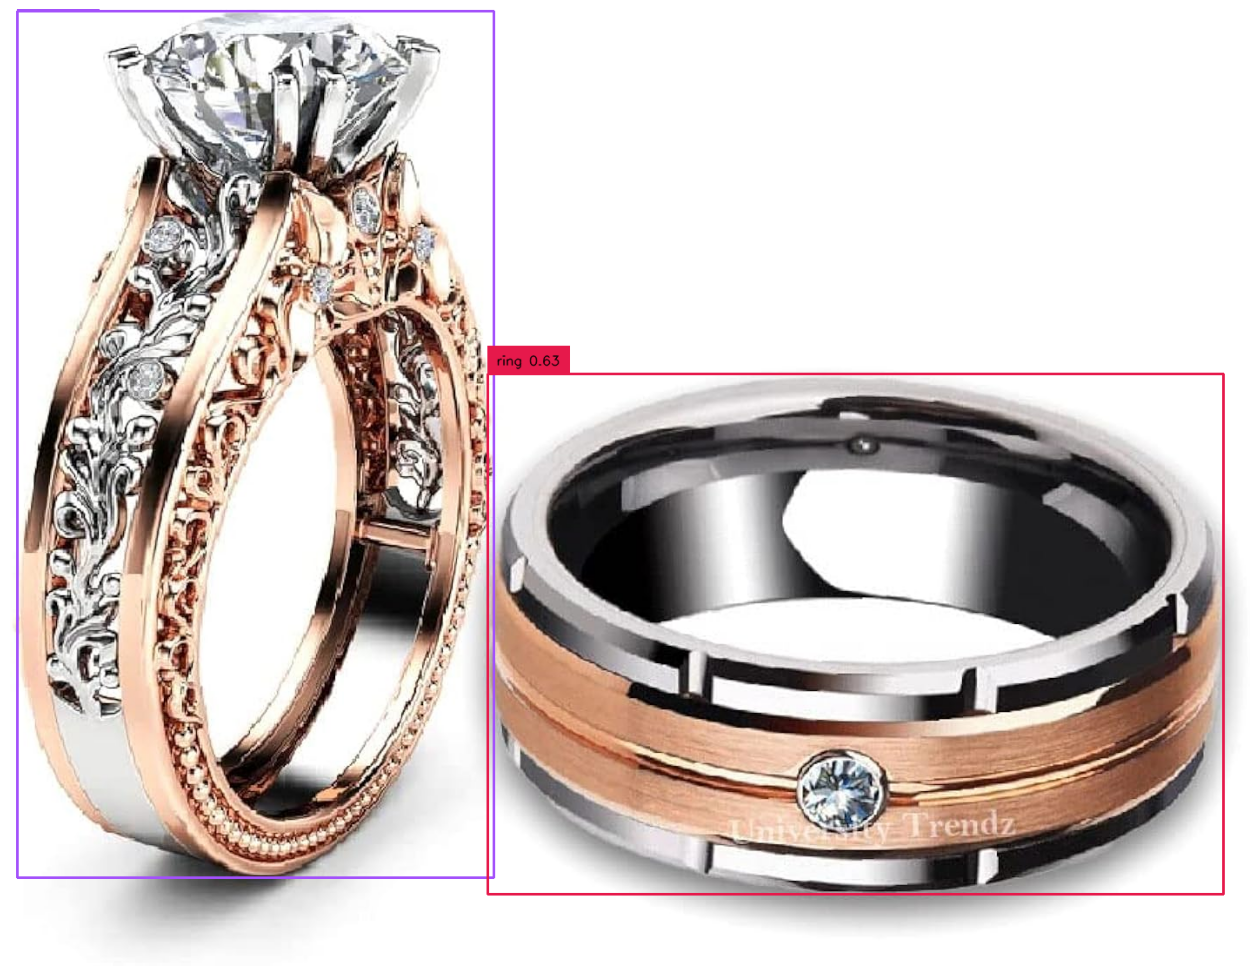

In [47]:
import os
import supervision as sv

IMAGE_NAME = "/content/data/61R7iD7PGlL._AC_UY1100_.jpg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

TEXT_PROMPT = "ring"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

In [50]:
import torch
import cv2
image = cv2.imread(IMAGE_PATH)

In [41]:
def calculate_iou(box1, box2):
    x1, y1, h1, w1 = box1
    x2, y2, h2, w2 = box2

    x1_left, x2_left = (x1 - w1 / 2), (x2 - w2 / 2)
    y1_top, y2_top = (y1 - h1 / 2), (y2 - h2 / 2)
    x1_right, x2_right = (x1 + w1 / 2), (x2 + w2 / 2)
    y1_bottom, y2_bottom = (y1 + h1 / 2), (y2 + h2 / 2)

    intersection_left = max(x1_left, x2_left)
    intersection_top = max(y1_top, y2_top)
    intersection_right = min(x1_right, x2_right)
    intersection_bottom = min(y1_bottom, y2_bottom)

    if intersection_right <= intersection_left or intersection_bottom <= intersection_top:
        intersection_area = 0
    else:
        intersection_area = (intersection_right - intersection_left) * (intersection_bottom - intersection_top)

    area1 = h1 * w1
    area2 = h2 * w2
    union_area = area1 + area2 - intersection_area

    iou = intersection_area / union_area if union_area > 0 else 0

    return iou

In [42]:
threshold = 0.95
for i in range(len(boxes)):
  for j in range(i+1,len(boxes)):
    iou_value = calculate_iou(boxes[i],boxes[j])
    if iou_value > threshold:
      boxes = torch.cat((boxes[:j], boxes[j + 1:]))

In [43]:
# Tính toán tọa độ của góc trái trên cùng và góc phải dưới cùng
x1 = boxes[:, 0] - boxes[:, 2] / 2
y1 = boxes[:, 1] - boxes[:, 3] / 2
x2 = boxes[:, 0] + boxes[:, 2] / 2
y2 = boxes[:, 1] + boxes[:, 3] / 2

# Tạo tensor mới chứa tọa độ của góc trái trên cùng và góc phải dưới cùng
coordinates = (torch.stack([x1, y1, x2, y2], dim=1)).to(torch.int)

In [44]:
# Lấy tọa độ bé nhất ở góc trái trên
min_x = torch.min(coordinates[:, 0])
min_y = torch.min(coordinates[:, 1])

# Lấy tọa độ lớn nhất ở góc phải dưới
max_x = torch.max(coordinates[:, 2])
max_y = torch.max(coordinates[:, 3])

In [45]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

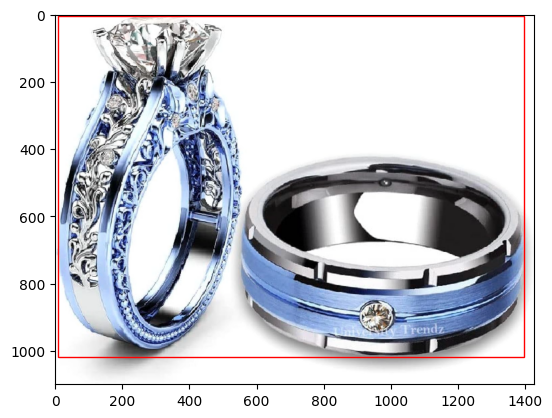

In [46]:
# Hiển thị ảnh
fig, ax = plt.subplots(1)
ax.imshow(image)

# Tạo patch (hình chữ nhật) để biểu diễn bounding box
rect = patches.Rectangle((min_x, min_y), max_x - min_x, max_y - min_y, linewidth=1, edgecolor='r', facecolor='none')

# Thêm patch vào subplot
ax.add_patch(rect)

# Hiển thị ảnh với bounding box sử dụng Matplotlib
plt.show()

In [51]:
def findBBox(boxes, IMAGE_PATH, threshold):
  # read image
  image = cv2.imread(IMAGE_PATH)
  height, width, _ = image.shape
  boxes = (boxes * torch.Tensor([width, height, width, height])).to(torch.int)
  # remove overlap bounding boxes
  for i in range(len(boxes)):
    for j in range(i+1,len(boxes)):
      iou_value = calculate_iou(boxes[i],boxes[j])
      if iou_value > threshold:
        boxes = torch.cat((boxes[:j], boxes[j + 1:]))
  # finding the min(left) and max(right) coordinates
  x1 = boxes[:, 0] - boxes[:, 2] / 2
  y1 = boxes[:, 1] - boxes[:, 3] / 2
  x2 = boxes[:, 0] + boxes[:, 2] / 2
  y2 = boxes[:, 1] + boxes[:, 3] / 2
  coordinates = (torch.stack([x1, y1, x2, y2], dim=1)).to(torch.int)
  min_x = torch.min(coordinates[:, 0])
  min_y = torch.min(coordinates[:, 1])
  max_x = torch.max(coordinates[:, 2])
  max_y = torch.max(coordinates[:, 3])
  # return bbox
  return min_x, min_y, max_x, max_y

min_x, min_y, max_x, max_y = findBBox(boxes, IMAGE_PATH, 0.9)

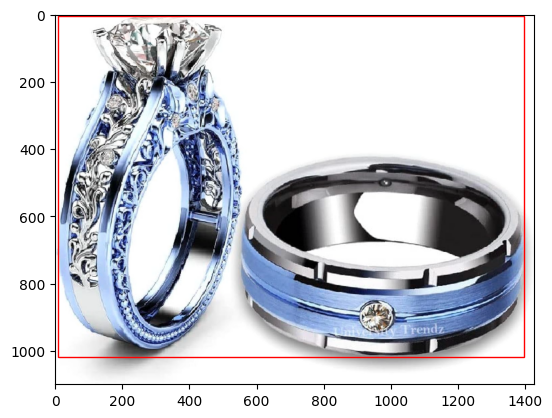

In [52]:
# Hiển thị ảnh
fig, ax = plt.subplots(1)
ax.imshow(image)

# Tạo patch (hình chữ nhật) để biểu diễn bounding box
rect = patches.Rectangle((min_x, min_y), max_x - min_x, max_y - min_y, linewidth=1, edgecolor='r', facecolor='none')

# Thêm patch vào subplot
ax.add_patch(rect)

# Hiển thị ảnh với bounding box sử dụng Matplotlib
plt.show()